In [77]:
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv',sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [20]:
# 기초데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [4]:
df.shape

(4622, 5)

In [5]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [3]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [78]:
# 주문당 평균 계산금액 출력
df['item_price'] =  df['item_price'].str.replace("$","").astype(float)
df


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [36]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [75]:
df.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [79]:
# 한 주문에 10달러 이상 사용한 주문 번호를 출력
df_sum = df.groupby('order_id').sum()

df_sum[df_sum['item_price']>=10].sort_values('item_price',ascending=False).head()
df_sum[df_sum['item_price']>=10].sort_values('item_price',ascending=False).head().idxmax()
df_sum[df_sum['item_price']>=10].sort_values('item_price',ascending=False).head()['item_price']


order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
Name: item_price, dtype: float64

In [80]:
df[df['item_name'] == '6 Pack Soft Drink']

,order_id,quantity,item_name,choice_description,item_price
298,129,1,6 Pack Soft Drink,[Sprite],6.49
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
357,154,1,6 Pack Soft Drink,[Coke],6.49
388,168,1,6 Pack Soft Drink,[Diet Coke],6.49
417,182,1,6 Pack Soft Drink,[Diet Coke],6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49
639,264,1,6 Pack Soft Drink,[Diet Coke],6.49
721,298,1,6 Pack Soft Drink,[Nestea],6.49
743,306,1,6 Pack Soft Drink,[Coke],6.49
879,363,1,6 Pack Soft Drink,[Coke],6.49


In [81]:
df[df['item_name'] == '6 Pack Soft Drink'].sort_values('quantity',ascending=False)

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
298,129,1,6 Pack Soft Drink,[Sprite],6.49
3693,1480,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
2793,1109,1,6 Pack Soft Drink,[Diet Coke],6.49
2860,1136,1,6 Pack Soft Drink,[Diet Coke],6.49
3010,1196,1,6 Pack Soft Drink,[Diet Coke],6.49
3132,1248,1,6 Pack Soft Drink,[Diet Coke],6.49
3141,1253,1,6 Pack Soft Drink,[Lemonade],6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49


In [82]:
# item_name 당 주문 개수 //  주문 총량
df.groupby('item_name').size()
df.groupby('item_name')['order_id'].count().head()

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: order_id, dtype: int64

<BarContainer object of 5 artists>

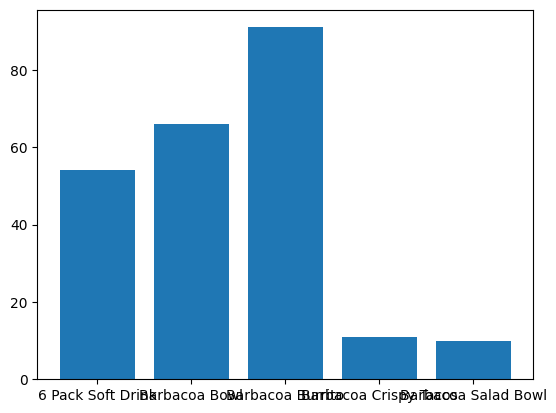

In [83]:
import matplotlib.pyplot as plt
x = df.groupby('item_name')['order_id'].count().head().index
y = df.groupby('item_name')['order_id'].count().head().values
plt.bar(x,y)

In [84]:
df.groupby('item_name')['quantity'].sum().head(10)

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [87]:
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv',sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [88]:
df['item_price'] =  df['item_price'].str.replace("$","").astype(float)
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [85]:
## 각 아이템의 가격을 구하시오
num = df.groupby('item_name')['quantity'].sum()

price = df.groupby('item_name')['item_price'].sum()
price/num

item_name
6 Pack Soft Drink                         6.490000
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.017500
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.433934
Bowl                                      7.400000
Burrito                                   7.400000
Canned Soda                               1.090000
Canned Soft Drink                         1.250000
Carnitas Bowl                            10.376197
Carnitas Burrito                          9.963833
Carnitas Crispy Tacos                     9.745000
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                              9.648791
Chicken Burrito                           9.434552
Chicken Crispy Tacos 

In [ ]:
## 주문이 1개이면서 item_name이 최저가격인 것을 출력 
qu_df = df[df['quantity'] == 1]  
qu_df.groupby('item_price').min() 
groupby_df = qu_df.groupby('item_price').min()
groupby_df.sort_values('item_price',ascending=False)

In [100]:
# 가장 비싼 주문에서 item이 총 몇 개 주문되었는지 출력하시오
# 주문에서 가장 높은 금액으로 주문한 주문번호, 수량, 금액을 출력하시오


# 가장 비싼 주문
g_df = df.groupby('order_id').sum()
g_df[['order_id','quantity']]

df.groupby('order_id')[['order_id','quantity','item_price']].sum().sort_values('item_price')
# df.groupby('order_id')[['order_id','quantity','item_price']].sum().sort_values('item_price',ascending=False)

df.groupby.sort_values('item_price')

# max_df = df.groupby('order_id')['item_price'].sum().max()  # 205.25



,order_id,quantity,item_price
order_id,,,
113,226,2,10.08
1122,2244,2,10.08
100,200,2,10.08
1494,2988,2,10.08
1475,2950,2,10.08
...,...,...,...
1786,19646,20,114.30
691,7601,11,118.25
1483,20762,14,139.00


In [111]:
# chicken Bowl를 한 주문에 2개 이상 주문한 횟수가 몇번인지 출력
filt = df[df['item_name'] == 'Chicken Bowl']
filt
filt[filt['quantity']>=2]

len(filt[filt['quantity']>=2])


# chicken Bowl 총 매출액
filt['item_price'].sum()

# chicken Bowl 은 총 매출액의 몇 %인가
c_sum = filt['item_price'].sum()
a_sum = df['item_price'].sum()

c_sum/a_sum*100


21.283176657731442